


# Remarque préalable

Les TP sont en python. Il est important d'en garder la trace convenablement: soit sous la forme d'un script ou d'un notebook. Néanmoins il faut réfléchir aux structures de données à mettre en oeuvre et penser à créer des fonctions, facilement ré-utilisables et bien paramètrées. 

Les toolkits utiles sont en général installés dans: 
 /partage/public/allauzen/python2.7/site-packages
 




# python et ipython notebook

Les TPs seront fait en python et avec les notebook ipython. Donc pour bien commencer, regarder les tutoriels suivant: 
* Pour python et numpy: http://cs231n.github.io/python-numpy-tutorial/
* Pour ipython : http://cs231n.github.io/ipython-tutorial/

Pour bien faire ce TP, le plus simple est d'utiliser sa version notebook, soit le fichier de départ 
 TC4-tp1.ipynb
 
Pour lancer une session, créer un répertoire puis y copier le fichier *ipynb*. Placer vous dans ce répertoire executer:
 jupytrt notebook
 
Sélectionner le fichier que vous souhaiter à savoir *TC4-tp1.ipynb*. C'est parti.



# Les données : le Brown corpus

L'objectif de cette première partie est de charger les données et de regarder (statistiquement) ce qu'elles contiennent. Le corpus utilisé contient du texte étiqueté en partie du discours, ou *POS tags* pour *Part Of Speech*: à chaque mot d'une phrase est associé une classe grammaticale. Ainsi une séquence de mot doit être associée à une séquence de tags (de même longueur).   Le corpus est organisé comme un ensemble de phrases. À chaque mot est associé une catégorie grammaticale et donc chaque phrase est une séquence de mots à laquelle est associée une séquence de catégorie. 

Supposons qu'un mot est la réalisation d'une variable aléatoire notée *X* et que son étiquette est la réalisation de la variable aléatoire *Y*. 


Pour le chargé, il y a deux possibilités. 

##  Solution 1:  NLTK
Les données sont distribuées avec le toolkit *NLTK (Natural Language ToolKit)* 


In [1]:
#import nltk

In [2]:
# path_download = '/home/keanu/LinktoM2/Apprentissage/Part2/' #to change to the path you want
# nltk.data.path = [path_download]

In [3]:
# print(nltk.data.path)

In [4]:
# import nltk
# nltk.download('brown', download_dir=path_download)
# nltk.download('universal_tagset', download_dir=path_download)
# data = nltk.corpus.brown.tagged_sents(tagset='universal')

## Solution 2: Pickle
Si vous faites des traitements sur les données, il est toujours possible de sauvegarder sur disque la version traitée pour ne pas avoir à recommencer depuis le début. En python, la serialisation d'objet se nomme pickle et est très simple d'utilisation. Dans notre cas, data contient plus que les données. Nous allons ici simplement extraire les données dans une liste pour pouvoir les sauver. 


In [5]:
import pickle

In [6]:
ldata=[]
for sentence in data: 
    ldata.append(sentence)
pickle.dump(ldata, open( "brown.save.p", "wb" ) )

Pour charger les données à partir du fichier ainsi créé, il suffit de :

In [7]:
data = pickle.load( open( "brown.save.p", "rb" ) )

In [8]:
print(data[0]) # on obtient la même chose avec data ou ldata

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]


Voici donc la première phrase du corpus, vue comme une séquence de couple *(mot,label)*. La première chose à faire est de diviser les données en 3 parties: apprentissage (*train*), développement (*dev*) et évaluation (*test*). Une répartition est en gros 80%, 10%, 10% respectivement. 

## S'échauffer en python

* De quel type est la variable data ? Et pour data[0] ? 
* Combien y-a-t-il de phrases dans le corpus ? 
* Combien y-a-t-il de mots (nombre d'occurence, par exemple il y a 25 mots dans la première phrase) ? 
* Quel est la taille du vocabulaire (la liste des mots qui apparaissent au moins une fois dans le corpus) ? Pour répondre à cette question, une solution est de construire un set en parcourant le corpus. 
* Quel est la liste des tags utilisés ? Combien y-en-t-il ? 
* Construire une map qui stocke l'association ("mot",compte du mot) et estimer ces comptes sur tous le corpus. 

In [9]:
# affichage du type
print("FullDataType :", type(data))
print("SingleDataType :", type(data[0]))
print("Len data :", len(data))
print("Len data 0 :", len(data[0]))
dict_voc = dict()
set_voc = list()
set_tag = list()
for phr in data:
    for mot in phr:
        if not(mot[0] in set_voc):
            set_voc.append(mot[0])
            dict_voc[mot[0]]=0
        dict_voc[mot[0]]+=1
        if not(mot[1] in set_tag):
            set_tag.append(mot[1])
print("Number of words in vocabulary :", len(set_voc))
print("Nomber of tags :", len(set_tag))
print("Tags\n", set_tag)
print("Number of times apple appeared :", dict_voc["apple"])
  
# ... 

FullDataType : <class 'list'>
SingleDataType : <class 'list'>
Len data : 57340
Len data 0 : 25
Number of words in vocabulary : 56057
Nomber of tags : 12
Tags
 ['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X']
Number of times apple appeared : 8


In [10]:
print(dict_voc)

{'The': 7258, 'Fulton': 17, 'County': 85, 'Grand': 18, 'Jury': 4, 'said': 1943, 'Friday': 60, 'an': 3542, 'investigation': 43, 'of': 36080, "Atlanta's": 4, 'recent': 167, 'primary': 93, 'election': 72, 'produced': 90, '``': 8837, 'no': 1781, 'evidence': 201, "''": 8789, 'that': 10237, 'any': 1301, 'irregularities': 8, 'took': 425, 'place': 528, '.': 49346, 'jury': 63, 'further': 194, 'in': 19536, 'term-end': 1, 'presentments': 1, 'the': 62713, 'City': 134, 'Executive': 9, 'Committee': 88, ',': 58334, 'which': 3540, 'had': 5102, 'over-all': 35, 'charge': 120, 'deserves': 16, 'praise': 17, 'and': 27915, 'thanks': 27, 'Atlanta': 35, 'for': 8841, 'manner': 124, 'was': 9777, 'conducted': 55, 'September-October': 1, 'term': 79, 'been': 2470, 'charged': 57, 'by': 5103, 'Superior': 16, 'Court': 110, 'Judge': 39, 'Durwood': 1, 'Pye': 1, 'to': 25732, 'investigate': 11, 'reports': 78, 'possible': 373, 'hard-fought': 2, 'won': 68, 'Mayor-nominate': 1, 'Ivan': 4, 'Allen': 20, 'Jr.': 75, 'Only': 102

## Questions 

1. Comment faire une séparation aléatoire des données qui respectent (à peu près) la répartition proposée ? 
2. Réaliser ce partage. 
3. Sur les données d'apprentissage, contruire l'espace de réalisation concernant les étiquettes, calculer la distribution et la représenter avec matplotlib. Estimer et représenter la distribution mesurée sur les données de *dev* également. 
4. Pour les mots, construire également l'espace de réalisation et calculer le compte de chaque mot. Puis représenter les comptes de comptes (soit combien de mots apparaissent une fois, deux fois, ... ). 
5. Représenter l'histogramme correspondant.

In [11]:
import numpy as np
perm = np.random.permutation(len(data))
data_perm = list()
for i in range(len(perm)):
    data_perm.append(data[perm[i]])
data_array = np.array(data_perm)
train_set = data_array[:int(0.8*len(data))]
dev_set = data_array[int(0.8*len(data)):int(0.9*len(data))]
test_set = data_array[int(0.9*len(data)):]

In [12]:
perm = np.random.permutation(len(data))
print(perm[1])

15229


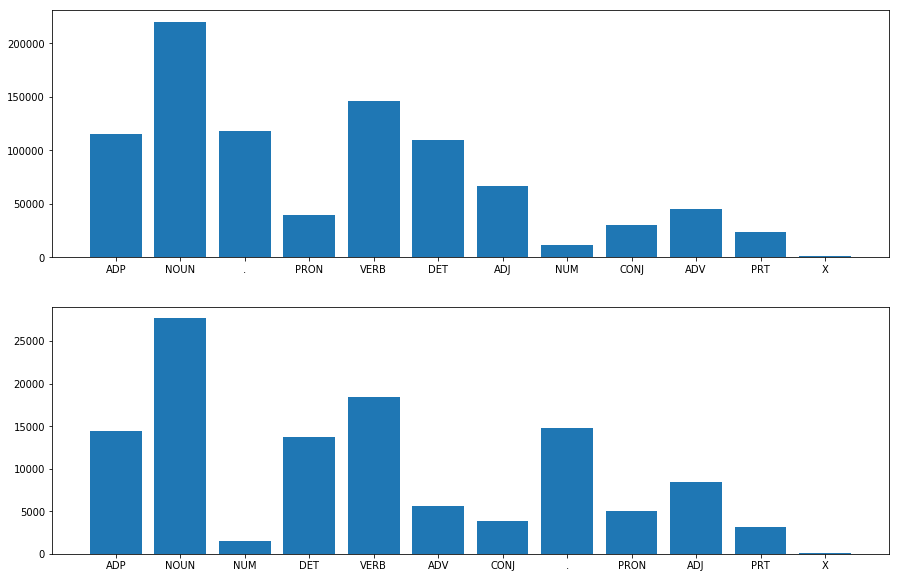

In [13]:
def distrib_y_dataset(dataset):   
    set_tag=list()
    dict_tag=dict()
    for phr in dataset:
        for mot in phr:
            if not(mot[1] in set_tag):
                set_tag.append(mot[1])
                dict_tag[mot[1]]=0
            dict_tag[mot[1]]+=1
    return dict_tag

import matplotlib.pyplot as plt 
%matplotlib inline

dict_tag_train = distrib_y_dataset(train_set)
dict_tag_dev = distrib_y_dataset(dev_set)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.bar(dict_tag_train.keys(), dict_tag_train.values())
plt.subplot(212)
plt.bar(dict_tag_dev.keys(), dict_tag_dev.values())
plt.show()

In [14]:
def distrib_x_dataset(dataset):   
    set_mot=list()
    dict_mot=dict()
    for phr in dataset:
        for mot in phr:
            if not(mot[0] in set_mot):
                set_mot.append(mot[0])
                dict_mot[mot[0]]=0
            dict_mot[mot[0]]+=1
    return dict_mot

distrib_mot_train = distrib_x_dataset(train_set)
distrib_mot_dev = distrib_x_dataset(dev_set)
distrib_mot_test = distrib_x_dataset(test_set)

def compte_comptes(distrib):
    compte = np.zeros(max(distrib.values())+1)
    for x in distrib.values():
        compte[x] +=1
    return compte

comptes_train = compte_comptes(distrib_mot_train)
comptes_dev = compte_comptes(distrib_mot_dev)

In [15]:
print(distrib_mot_train)

{'Like': 44, 'Lincoln': 41, ',': 46676, 'he': 5281, 'can': 1390, 'distinguish': 14, 'his': 5209, 'relation': 45, 'to': 20489, 'God': 234, 'from': 3426, 'the': 50120, 'constitutional': 23, 'responsibilities': 18, 'a': 17469, 'questionable': 5, 'decision': 95, 'exacts': 1, 'of': 28838, 'him': 2083, '.': 39488, 'Mileage': 1, 'allowances': 18, 'for': 7028, 'state': 442, 'employees': 58, 'are': 3450, 'two': 1046, 'types': 93, ':': 1437, '(': 1974, 'A': 1028, ')': 2005, 'actual': 82, 'mileage': 12, 'and': 22223, 'B': 78, 'fixed': 66, 'monthly': 19, 'But': 1078, 'Gardner': 4, 'Willings': 6, 'was': 7811, 'not': 3575, 'included': 73, ';': 4416, 'Because': 59, "that's": 75, 'what': 1134, "you're": 81, 'doing': 136, '--': 2711, 'wrecking': 4, 'it': 5374, "''": 7012, '!': 1264, '``': 7052, 'The': 5829, 'President': 203, 'says': 157, 'translator': 1, 'came': 497, 'in': 15653, 'that': 8102, 'reason': 183, 'asked': 312, 'you': 2187, 'where': 679, 'were': 2615, 'going': 326, 'is': 7997, 'because': 661

In [16]:
print(comptes_train)

[0.0000e+00 2.3405e+04 7.4220e+03 ... 0.0000e+00 0.0000e+00 1.0000e+00]


In [17]:
print(comptes_dev)

[0.000e+00 9.939e+03 2.589e+03 ... 0.000e+00 0.000e+00 1.000e+00]


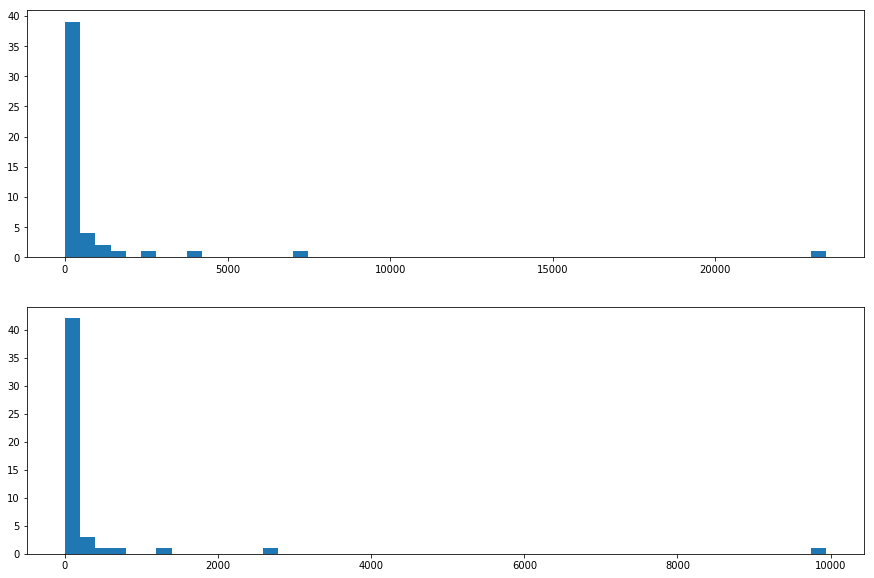

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.hist(comptes_train[:50], bins=50)
plt.subplot(212)
plt.hist(comptes_dev[:50], bins=50)
plt.show()

In [19]:
print(max(distrib_mot_train.values()))
print(distrib_mot_train['the'])

50120
50120


# Probabilités



1. Nous allons limiter le vocabulaire aux mots apparaissant 10 fois ou plus. Les autres mots sont tous remplacés par la même forme \*unk\*
2. Estimer la distribution *P(Y|X)* sur les données d'apprentissage
3. Sur les données de test, effectuer la prédiction des etiquettes les plus probables et comparer votre prédiction aux etiquettes de référence et calculer le taux d'erreur.


In [20]:
def clean_voc(dict_word):
    new_dict = dict()
    new_dict['unk'] = 0
    for key, val in dict_word.items():
        if val < 10: 
            new_dict['unk'] += val
        else:
            new_dict[key] = val
    return new_dict

In [21]:
clean_train = clean_voc(distrib_mot_train)
clean_dev = clean_voc(distrib_mot_dev)
clean_test = clean_voc(distrib_mot_test)

In [22]:
print(clean_train)

{'unk': 95859, 'Like': 44, 'Lincoln': 41, ',': 46676, 'he': 5281, 'can': 1390, 'distinguish': 14, 'his': 5209, 'relation': 45, 'to': 20489, 'God': 234, 'from': 3426, 'the': 50120, 'constitutional': 23, 'responsibilities': 18, 'a': 17469, 'decision': 95, 'of': 28838, 'him': 2083, '.': 39488, 'allowances': 18, 'for': 7028, 'state': 442, 'employees': 58, 'are': 3450, 'two': 1046, 'types': 93, ':': 1437, '(': 1974, 'A': 1028, ')': 2005, 'actual': 82, 'mileage': 12, 'and': 22223, 'B': 78, 'fixed': 66, 'monthly': 19, 'But': 1078, 'was': 7811, 'not': 3575, 'included': 73, ';': 4416, 'Because': 59, "that's": 75, 'what': 1134, "you're": 81, 'doing': 136, '--': 2711, 'it': 5374, "''": 7012, '!': 1264, '``': 7052, 'The': 5829, 'President': 203, 'says': 157, 'came': 497, 'in': 15653, 'that': 8102, 'reason': 183, 'asked': 312, 'you': 2187, 'where': 679, 'were': 2615, 'going': 326, 'is': 7997, 'because': 661, 'hoped': 39, 'would': 2093, 'be': 5073, 'visiting': 27, 'other': 1322, 'areas': 175, 'South

In [23]:
def tagsPerWord(dataset, tags):
    set_mot = list()
    dict_mot = dict()
    set_mot_tag = list()
    for phr in dataset:
        for mot in phr:
            if not(mot[0] in set_mot):
                set_mot.append(mot[0])
                dict_mot[mot[0]]=dict()
                for tag in tags:
                    dict_mot[mot[0]][tag] = 0
            else:
                if mot[1] in dict_mot[mot[0]].keys():
                    dict_mot[mot[0]][mot[1]] += 1
    return dict_mot

In [24]:
tagsWord_train = tagsPerWord(train_set,set_tag)
tagsWord_dev = tagsPerWord(dev_set, set_tag)
tagsWord_test = tagsPerWord(test_set, set_tag)

In [25]:
print(tagsWord_train['the'])

{'DET': 50116, 'NOUN': 0, 'ADJ': 0, 'VERB': 0, 'ADP': 0, '.': 0, 'ADV': 0, 'CONJ': 0, 'PRT': 0, 'PRON': 0, 'NUM': 0, 'X': 3}


In [26]:
def p_y_x(dict_tag_word, dict_word, Y, X):
    return dict_tag_word[X][Y]/dict_word[X]

In [27]:
print(p_y_x(tagsWord_train, clean_train, 'PRT', 'to'))

0.571623798135585


In [28]:
def prob_etiquette_knowing_word(dict_tag_word, dict_word, etiquettes):
    dict_res = dict()
    for key in dict_word.keys():
        if not key == 'unk':
            if not key in dict_res:
                dict_res[key] = dict()
            for etiq in etiquettes:
                dict_res[key][etiq] = p_y_x(dict_tag_word, dict_word, etiq, key)
    return dict_res

In [29]:
prob_yx_train = prob_etiquette_knowing_word(tagsWord_train, clean_train, set_tag)

In [30]:
print(prob_yx_train)

{'Like': {'DET': 0.0, 'NOUN': 0.0, 'ADJ': 0.022727272727272728, 'VERB': 0.0, 'ADP': 0.9545454545454546, '.': 0.0, 'ADV': 0.0, 'CONJ': 0.0, 'PRT': 0.0, 'PRON': 0.0, 'NUM': 0.0, 'X': 0.0}, 'Lincoln': {'DET': 0.0, 'NOUN': 0.975609756097561, 'ADJ': 0.0, 'VERB': 0.0, 'ADP': 0.0, '.': 0.0, 'ADV': 0.0, 'CONJ': 0.0, 'PRT': 0.0, 'PRON': 0.0, 'NUM': 0.0, 'X': 0.0}, ',': {'DET': 0.0, 'NOUN': 0.0, 'ADJ': 0.0, 'VERB': 0.0, 'ADP': 0.0, '.': 0.9999785757134287, 'ADV': 0.0, 'CONJ': 0.0, 'PRT': 0.0, 'PRON': 0.0, 'NUM': 0.0, 'X': 0.0}, 'he': {'DET': 0.0, 'NOUN': 0.0, 'ADJ': 0.0, 'VERB': 0.0, 'ADP': 0.0, '.': 0.0, 'ADV': 0.0, 'CONJ': 0.0, 'PRT': 0.0, 'PRON': 0.9994319257716342, 'NUM': 0.0, 'X': 0.0003787161522438932}, 'can': {'DET': 0.0, 'NOUN': 0.005035971223021582, 'ADJ': 0.0, 'VERB': 0.9935251798561151, 'ADP': 0.0, '.': 0.0, 'ADV': 0.0, 'CONJ': 0.0, 'PRT': 0.0, 'PRON': 0.0, 'NUM': 0.0, 'X': 0.0007194244604316547}, 'distinguish': {'DET': 0.0, 'NOUN': 0.0, 'ADJ': 0.0, 'VERB': 0.9285714285714286, 'ADP': 

In [31]:
def predict_test(test_set, probas):
    nb = 0
    error = 0
    for phr in test_set:
        for mot in phr:
            nb += 1
            key_max = ''
            val_max = 0
            if mot[0] in probas:
                for key, val in probas[mot[0]].items():
                    if val > val_max:
                        key_max = key
                        val_max = val
                if key_max != mot[1]:
                    error +=1
            else : 
                error +=1
    return 1 - error/nb

In [33]:
print("Proportion of correct predictions:", predict_test(test_set, prob_yx_train))

Proportion of correct predictions: 0.8480242380671168
